<a href="https://colab.research.google.com/github/Picard1203/The_Universal_Translator/blob/main/gredient_decent_eyal_grisaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results for Normal Alpha (0.05):
    Epoch         x        dx    α * dx
0       0  1.000000 -3.000000 -0.150000
1       1  1.150000 -2.932500 -0.146625
2       2  1.296625 -2.736041 -0.136802
3       3  1.433427 -2.436423 -0.121821
4       4  1.555248 -2.075098 -0.103755
5       5  1.659003 -1.697145 -0.084857
6       6  1.743860 -1.340015 -0.067001
7       7  1.810861 -1.027513 -0.051376
8       8  1.862237 -0.769643 -0.038482
9       9  1.900719 -0.566116 -0.028306
10     10  1.929025 -0.410739 -0.020537
11     11  1.949562 -0.294998 -0.014750
12     12  1.964312 -0.210310 -0.010515
13     13  1.974827 -0.149137 -0.007457
14     14  1.982284 -0.105355 -0.005268
15     15  1.987552 -0.074225 -0.003711
16     16  1.991263 -0.052194 -0.002610
17     17  1.993873 -0.036652 -0.001833
18     18  1.995705 -0.025714 -0.001286
19     19  1.996991 -0.018028 -0.000901
20     20  1.997892 -0.012633 -0.000632

Results for Large Alpha (0.2):
    Epoch         x            dx        α * dx
0      

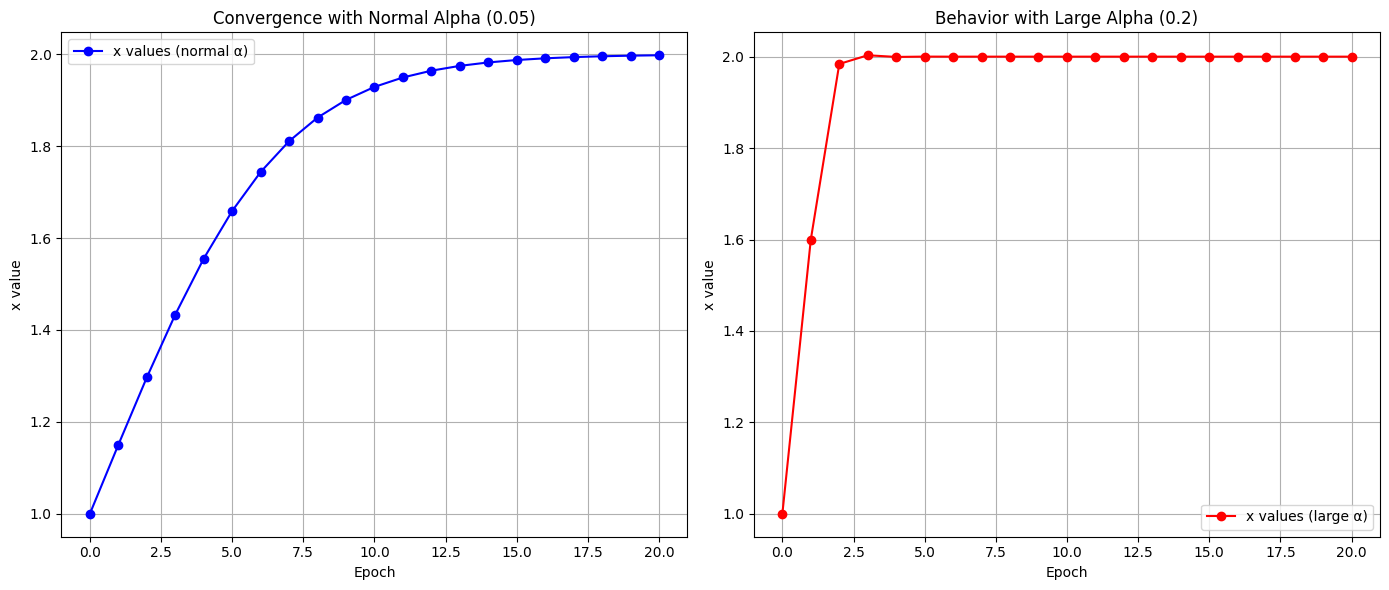

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def f(x):
    return x**3 - 3*x**2 + 2

def df(x):
    return 3*x**2 - 6*x

def gradient_descent(alpha, initial_x, epochs):
    x = initial_x
    results = []

    for epoch in range(epochs + 1):
        dx = df(x)
        alpha_dx = alpha * dx
        results.append((epoch, x, dx, alpha_dx))

        if epoch < epochs:  # Update x only for the first 'epochs' iterations
            x -= alpha_dx

        if abs(x) > 1e10:
            print(f"Overflow detected at epoch {epoch + 1}. Stopping early.")
            break

    return pd.DataFrame(results, columns=['Epoch', 'x', 'dx', 'α * dx'])

# Gradient descent parameters
epochs = 20
initial_x = 1

# Perform gradient descent for different learning rates
df_normal = gradient_descent(0.05, initial_x, epochs)
df_large = gradient_descent(0.2, initial_x, epochs)

# Print the DataFrames
print("Results for Normal Alpha (0.05):")
print(df_normal)
print("\nResults for Large Alpha (0.2):")
print(df_large)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df_normal['Epoch'], df_normal['x'], marker='o', color='b', label='x values (normal α)')
plt.xlabel('Epoch')
plt.ylabel('x value')
plt.title('Convergence with Normal Alpha (0.05)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_large['Epoch'], df_large['x'], marker='o', color='r', label='x values (large α)')
plt.xlabel('Epoch')
plt.ylabel('x value')
plt.title('Behavior with Large Alpha (0.2)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
